In [1]:
import datajoint as dj
dj.config['database.host'] = "139.91.171.210"
dj.config['database.user'] = "eflab"

In [9]:
#from pipeline import experiment
import numpy as np
from imagesc import imagesc

In [2]:
map = dj.create_virtual_module('map.py', 'pipeline_map')

Please enter DataJoint password:  ········


Connecting eflab@139.91.171.210:3306


In [3]:
anatomy = dj.create_virtual_module('anatomy.py', 'pipeline_anatomy')

In [4]:
ang = (map.OptImageBar() & 'animal_id=9254' & 'axis="horizontal"').fetch1('ang')

In [10]:
positiveInput = (ang > 0)
l = np.mod(ang, 2*np.pi)
l[(l == 0) & positiveInput] = 2*np.pi
mn = np.percentile(l, 1)
mx = np.percentile(l, 99)
l[l>mx]=mx
l[l<mn]=mn


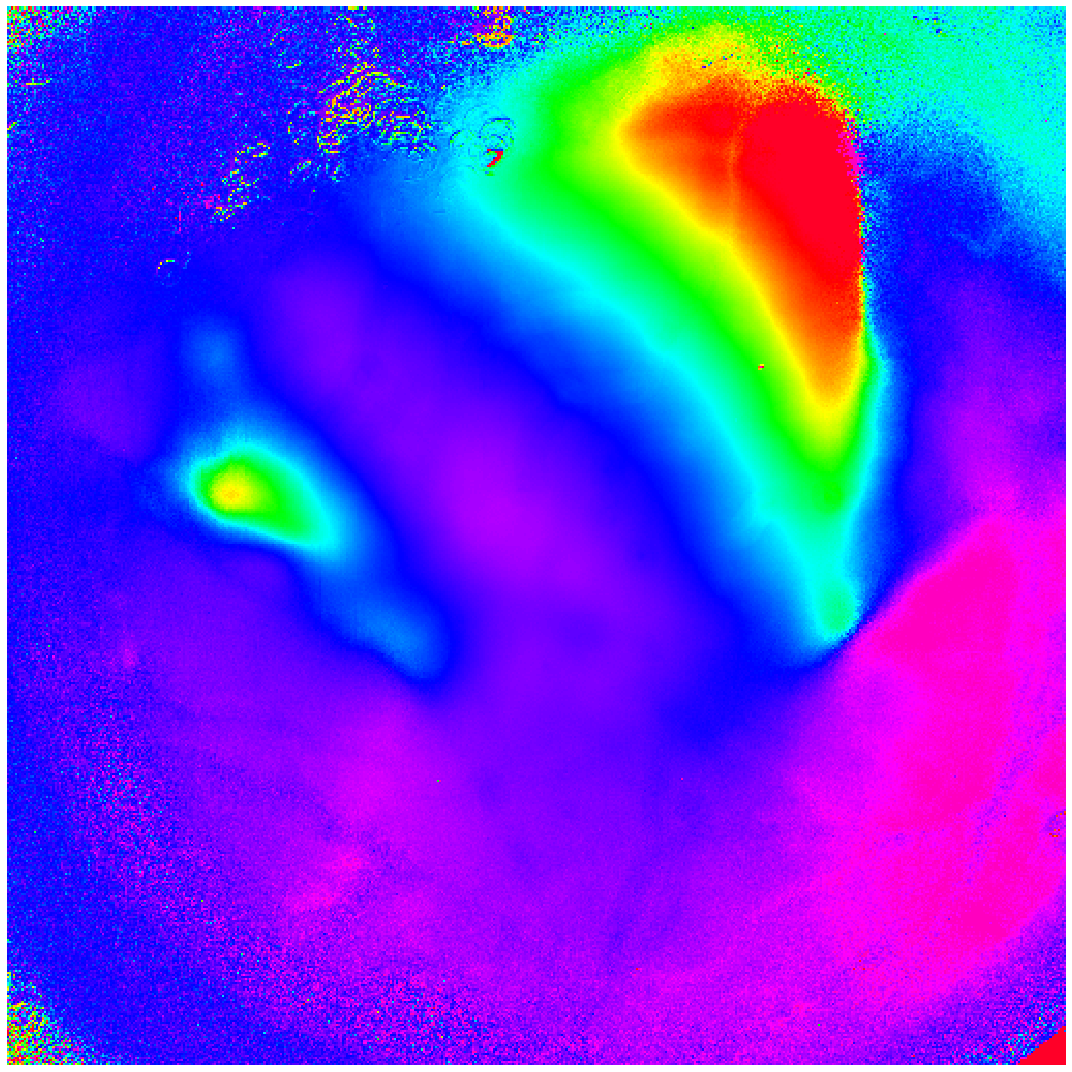

In [11]:
imagesc.clean(l,cmap='gist_rainbow');